<a href="https://colab.research.google.com/github/oranzoni/stock-prediction/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [5]:
df_ready = pd.read_csv('/content/konacni_dataset_R_label.csv')
df_ready

,Unnamed: 0,Ticker,Date,Close,High,Low,Open,Volume,Open tomorrow,Return value,Return target
0,0,A,2021-01-04,115.337715,116.747352,113.850303,115.629368,2.030700e+06,115.182172,-0.003867,0.0
1,1,AA,2021-01-04,22.343918,23.497153,22.223789,22.699499,5.400000e+06,22.391968,-0.013548,0.0
2,2,AAL,2021-01-04,15.130000,15.880000,15.030000,15.850000,6.973250e+07,14.920000,-0.058675,0.0
3,3,AAON,2021-01-04,42.214161,43.936391,41.940171,43.649352,4.200000e+05,42.070645,-0.036168,0.0
4,4,AAP,2021-01-04,141.919510,143.930963,140.674769,142.424624,8.491000e+05,140.918299,-0.010576,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065247,1065247,ZION,2025-05-29,47.730000,47.750000,46.889999,47.279999,1.421500e+06,NaN,NaN,NaN
1065248,1065248,ZM,2025-05-29,79.940002,80.309998,78.989998,80.230003,1.906400e+06,NaN,NaN,NaN
1065249,1065249,ZS,2025-05-29,251.110001,255.160004,248.740005,255.000000,4.228500e+06,NaN,NaN,NaN
1065250,1065250,ZTS,2025-05-29,167.139999,167.789993,165.110001,165.919998,2.450400e+06,NaN,NaN,NaN


# Library install

In [6]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3959    0  3959    0     0  26894      0 --:--:-- --:--:-- --:--:-- 26931
100  517k  100  517k    0     0  1298k      0 --:--:-- --:--:-- --:--:-- 1298k
--2025-06-04 18:10:39--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.145.37, 104.19.144.37, 2606:4700::6813:9125, ...
Connecting to anaconda.org (anaconda.org)|104.19.145.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [7]:
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Adding new features

In [8]:
#prvo će trebati dodati features koje su korisne za logistic regression, a potom uraditi treniranje na osnovu tih features
#moving average crossover
#RSI - relative strength index - speed and change of price movements of a stock
#volume - to već imamo
#koristit će se RSI, ali treba naznaciti da direktno ne korelira sa opening price, ali predstavlja dobar generalni indikator kretanja dionica
#RSI je zapravo momentum koji se izracunava na osnovu cijene zatvaranja
df_ready["RSI"] = ta.RSI(np.array(df_ready["Close"]), timeperiod =14) #obicno se uzima 14 dana za RSI kalkulaciju
df_ready["MA_21"] = ta.SMA(df_ready["Open"])
df_ready["MA_5"] = ta.SMA(df_ready["Open"])


In [9]:
df_ready.to_csv('LR_dataset_full.csv')

# Defining training and test datasets

In [10]:
model_lr = LogisticRegression(penalty = "l2", solver = "newton-cg", max_iter=100000)
#Posto LR ne prima NaN values, morat ce se ukloniti
df_ready = df_ready.dropna()

x_train = df_ready.iloc[:-200000].drop("Return target", axis=1)
y_train = df_ready.iloc[:-200000]["Return target"]

x_test  = df_ready.iloc[-200000:].drop("Return target", axis=1)
y_test  = df_ready.iloc[-200000:]["Return target"]


# Model fitting

In [11]:
predictors = ["Volume", "RSI", "Open", "Close"]
model_lr.fit(x_train[predictors], y_train)

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:312: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=100000, solver='newton-cg')

In [12]:
from sklearn.metrics import precision_score
predictions = model_lr.predict(x_test[predictors])
predictions= pd.Series(predictions, index = x_test.index, name= 'Return predikcije')

In [14]:
predictions.to_csv('Predikcije.csv')

# Model metrics

In [15]:
precision_modela = precision_score(y_test, predictions)
precision_modela

0.8266258493242739

Zaključak: potrebno je mnogo više iteracija (100000 minimalno ) za neki pristojan precision score. Uz to, "newton-cg" solver uz "l2" se pokazao kao zadovoljavajući. "newton-cg" solver zasniva se na Newton-Rhapsonovom metodu, brzo konvergira i pronalazi rješenje. l2 je ridge optimizacija koja isto brzo dovodi do rješenja za velike datasetove

In [16]:
#Recall - number of true positives in the model; considered good for 0.75 or above
from sklearn.metrics import recall_score
recall_modela = recall_score(y_test, predictions)
recall_modela

0.8616905354919053

In [17]:
F1 = 2* (precision_modela * recall_modela) / (precision_modela + recall_modela)
F1

0.843794062726268

# Backtesting

BACKTESTING prema zahtjevima zadatka: uvodi se nova kolona u kojoj će se računati : 1*Return target ako je predikcija == 1 ili -1*Return target ako je predikcija 0. Na kraju se to sve treba sumirati i vidjeti koliki je profit

Alternativa za ovo jeste da se napravi confidence trashold - za logistic regression je dobro uzeti da je 0.5, to je neki default.
Treba uraditi sljedece: proracunati s proba funkcijom vjerovatnocu da ce predicted return biti 1 ili 0, pa onda uzeti treshold i vidjeti gdje prelazi probability 50 posto. Kad se to uradi, onda isto uraditi kao za prethodni slucaj : 1*Return ako je predikcija == 1 ili -1*Return ako je predikcija 0 i sumirati

DAILY TRADING RULE 1.1

In [19]:
#za ovo je lakse spojiti x_test i y_test u jedan dataframe, pa cu to i uraditi, jer ce se imati slika svih kolona koje su potrebne
#inace su bili odvojeni za logistic regression, iako je u principu sve isto kao i kod random foresta
# bitno je samo sta koji df ili pandas series sadrzi - sto se vidi da je isto kod oba slucaja - notacija je drugacija

df_backtest = pd.concat([df_ready.iloc[-200000:], predictions], axis = 1) #treba da bude sve sadrzano, predikcije i stvarni testni podaci
df_backtest["Backtest_1"] = np.where(df_backtest["Return predikcije"] == df_backtest["Return target"], "1","-1")
df_backtest.to_csv("Backtesting_podaci.csv")

In [20]:
total_return_daily = df_backtest.groupby("Date")["Backtest_1"].agg(
    lambda grp: sum(int(v) for v in grp)
)

In [22]:
total_return_daily.to_csv("Total_daily_return.csv")
total_return_daily

,Backtest_1
Date,
2024-08-05,311
2024-08-06,641
2024-08-07,749
2024-08-08,899
2024-08-09,725
...,...
2025-05-21,882
2025-05-22,-14
2025-05-23,810


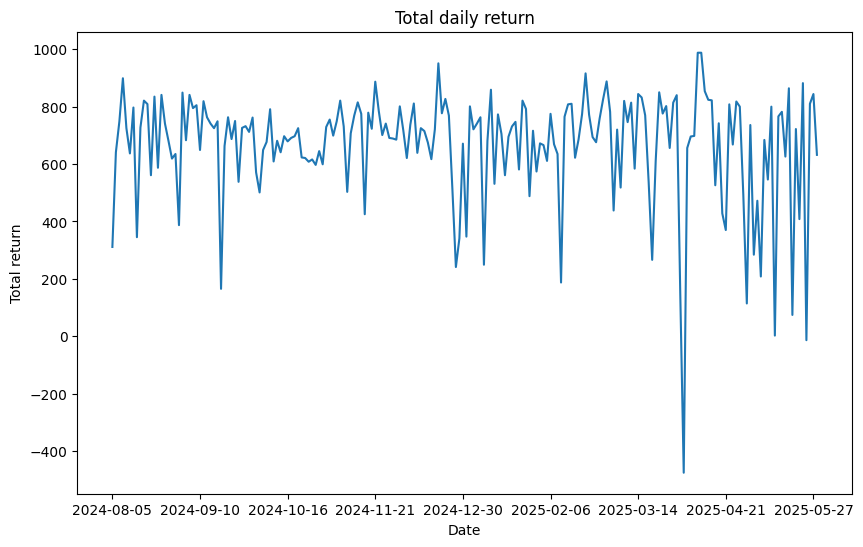

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
total_return_daily.plot(x='Date', y='Backtest_1', linewidth=1.5)
plt.title('Total daily return')
plt.xlabel('Date')
plt.ylabel('Total return')
plt.show()

DAILY TRADING RULE 1.1 - CONFIDENCE TRESHOLD

In [38]:
probabilities_thr = model_lr.predict_proba(x_test[predictors])
threshold = 0.5
predictions_thres = (probabilities_thr[:, 1] > threshold).astype(int)
predictions_thres


array([0, 0, 1, ..., 0, 0, 0])

In [39]:
df_backtest["Backtest_2"] = np.where(df_backtest["Return predikcije"] == predictions_thres, "1","-1")

In [40]:
daily_returns_int = df_backtest.groupby("Date")["Backtest_2"].agg(
    lambda grp: sum(int(v) for v in grp)
)

In [41]:
daily_returns_int

,Backtest_2
Date,
2024-08-05,359
2024-08-06,989
2024-08-07,989
2024-08-08,989
2024-08-09,989
...,...
2025-05-21,996
2025-05-22,996
2025-05-23,996


2. IN BACKTESTING - PORTFOLIO RETURN

In [43]:
portfolio_daily = df_backtest.groupby(["Ticker", "Date"])["Return value"].mean()
portfolio_daily

Ticker  Date      
A       2024-08-06    0.013513
        2024-08-07   -0.022587
        2024-08-08    0.020052
        2024-08-09   -0.000219
        2024-08-12   -0.007163
                        ...   
^GSPC   2025-05-21   -0.011661
        2025-05-22   -0.010164
        2025-05-23    0.012484
        2025-05-27    0.012209
        2025-05-28    0.002434
Name: Return value, Length: 200000, dtype: float64

In [44]:
#Zbog plottanja i činjenice da je previše tickera prisutno, odabrat će se nekoliko tickera čiji će se portfolio return plottati
#Naredni koraci će isto biti ispisani i plottani za tu grupu tickera
df_ticker = df_backtest.loc[df_backtest['Ticker'].isin(['AAPL', 'NVDA', 'MSFT', 'META', 'TSLA', 'AMZN', 'ADBE', 'AXP', 'AME'])]
df_ticker.to_csv = ("Izdvojeni_tickeri_backtest.csv")

In [49]:
predictions_training = model_lr.predict(x_train[predictors])
predictions_training = pd.Series(predictions_training, index = x_train.index, name= 'Return predikcije')
trening_i_predikcije = pd.concat([x_train.reset_index(drop=True), predictions_training.reset_index(drop=True)], axis = 1)
izdvojeni_tickeri_trening = trening_i_predikcije.loc[trening_i_predikcije['Ticker'].isin(['AAPL', 'NVDA', 'MSFT', 'META', 'TSLA', 'AMZN', 'ADBE', 'AXP', 'AME'])]

In [50]:
test_i_predikcije = pd.concat([x_test.reset_index(drop=True), predictions.reset_index(drop=True)], axis = 1)
izdvojeni_tickeri_test = test_i_predikcije.loc[test_i_predikcije['Ticker'].isin(['AAPL', 'NVDA', 'MSFT', 'META', 'TSLA', 'AMZN', 'ADBE', 'AXP', 'AME'])]

In [56]:
izdvojeni_tickeri_trening

,Unnamed: 0,Ticker,Date,Close,High,Low,Open,Volume,Open tomorrow,Return value,RSI,MA_21,MA_5,Return predikcije
18,47,AME,2021-01-04,115.152321,118.994627,114.500590,117.798160,1154500.0,114.704837,-0.026260,50.950818,92.398508,92.398508,0.0
26,55,AMZN,2021-01-04,159.331497,163.600006,157.201004,163.500000,88228000.0,158.300507,-0.031801,51.782693,107.669611,107.669611,0.0
58,87,AXP,2021-01-04,111.530663,115.083319,110.406283,114.610891,3472100.0,111.738529,-0.025062,51.170393,97.883824,97.883824,0.0
506,535,META,2021-01-04,267.678436,273.710007,263.955990,273.491038,15106100.0,267.031462,-0.023619,54.382295,124.346150,124.346150,0.0
532,561,MSFT,2021-01-04,209.617172,214.730254,206.843970,214.277682,37130100.0,209.203116,-0.023682,51.258544,171.427918,171.427918,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863646,863675,AME,2024-08-05,153.932022,155.882410,148.299752,149.762551,3114100.0,154.449469,0.031296,51.085403,92.864826,92.864826,1.0
863654,863683,AMZN,2024-08-05,161.020004,162.960007,151.610001,154.210007,83149400.0,161.710007,0.048635,50.431418,122.418718,122.418718,1.0
863688,863717,AXP,2024-08-05,224.058823,228.878786,220.200870,224.772892,4890700.0,225.090255,0.001412,54.144327,115.962559,115.962559,0.0
864170,864199,META,2024-08-05,474.471436,482.200932,449.607366,450.155930,21396200.0,477.732733,0.061261,55.678799,160.181522,160.181522,1.0


In [57]:
izdvojeni_tickeri_test

,Unnamed: 0,Ticker,Date,Close,High,Low,Open,Volume,Open tomorrow,Return value,RSI,MA_21,MA_5,Return predikcije
12,864268,NVDA,2024-08-05,100.425247,103.384525,90.667657,92.037315,552842400.0,103.814409,0.127960,49.025116,157.400233,157.400233,1.0
241,864497,TSLA,2024-08-05,198.880005,203.880005,182.000000,185.220001,100308800.0,200.750000,0.083846,51.366140,136.205707,136.205707,1.0
364,864620,AAPL,2024-08-06,206.265350,209.012512,200.134036,204.344342,69660500.0,205.936887,0.007793,49.102511,252.518592,252.518592,1.0
373,864629,ADBE,2024-08-06,514.200012,519.159973,509.010010,513.690002,2076300.0,520.950012,0.014133,52.817079,283.247586,283.247586,1.0
408,864664,AME,2024-08-06,156.210785,158.827903,154.359898,154.449469,1820500.0,157.524337,0.019909,51.165363,93.728061,93.728061,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199096,1063352,AXP,2025-05-28,293.359985,295.380005,292.380005,293.459991,1676900.0,296.260010,0.009541,52.861220,153.951865,153.951865,1.0
199580,1063836,META,2025-05-28,643.580017,650.880005,642.549988,642.599976,9042900.0,651.650024,0.014083,57.541923,178.854999,178.854999,1.0
199607,1063863,MSFT,2025-05-28,457.359985,462.519989,456.929993,461.220001,17086300.0,461.549988,0.000715,53.790775,256.480999,256.480999,0.0
199650,1063906,NVDA,2025-05-28,134.809998,137.250000,134.789993,136.029999,304021100.0,142.250000,0.045725,49.236827,197.436000,197.436000,0.0


# Cumulated strategy return and Compounded return ideja

Međuzaključak : Ove metrike trebale bi biti plottane za podatke koji se predviđaju. Prema ovome kako je definiran target, a to je da se predviđaju vrijednosti 0 ili 1, na osnovu predviđanja nije moguće indirektno izračunati cumulative strategy return. Ideja bi bila da se prati procentualna promjena cijena otvaranja ("Opening price") dionice i preko kumulativnog produkta te procentualne promjene na periodu koji nas zanima se računa Cumulative strategy return. Kako bi ovo imalo smisla posmatrati uopće, potrebno je uraditi predikciju na cijelom datasetu ali formirati target drugačije nego je ovdje formiran. Idealno bi bilo predviđati Return value kolonu, pa na osnovu njenog iznosa zaključiti da li je 1 ili 0 željena vrijednost. To bi bila ideja za poboljšanje.

Isti zaključak je tu za compounded return, s obzirom da se slično računa kao prethodnik.